In [1]:
import matplotlib.pyplot as plt
import nest
import sys
import numpy as np



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-3.0
 Built: Sep  9 2022 13:46:05

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.




Sep 09 14:51:03 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 09 14:51:03 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 09 14:51:03 SimulationManager::run [Info]: 
    Simulation finished.


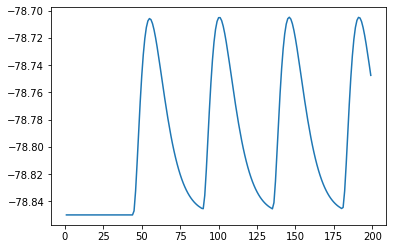

In [2]:
# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

tau_slow = {"tau_syn":(20.0,5.0)}     # Can adjust synaptic time constant this way
nest.SetDefaults("glif_psc", tau_slow)
neuron_post=nest.Create("glif_psc")
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 2, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['V_m'])


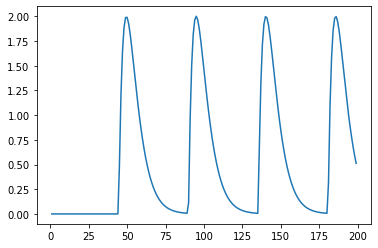

In [3]:
plt.plot(t, events['I_syn'])


Sep 09 14:52:09 NodeManager::prepare_nodes [Info]: 
    Preparing 8 nodes for simulation.

Sep 09 14:52:09 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 8
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 09 14:52:09 SimulationManager::run [Info]: 
    Simulation finished.


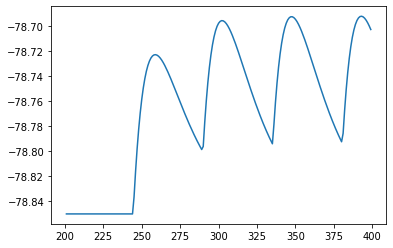

In [4]:
# Now test GLIF with bi-exponential synapse

neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("glif_psc_bix")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(1.0,1.0),"C_m":100.0})

syn_dict_in = {"receptor_type": 2, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn','i_syn_r','i_syn_d']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['V_m'])

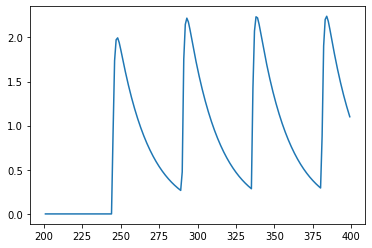

In [5]:
plt.plot(t, events['I_syn'])

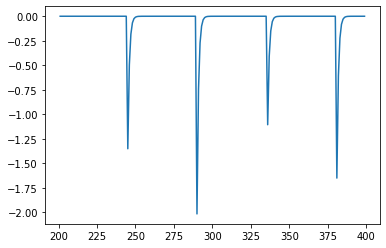

In [6]:
plt.plot(t, events['i_syn_r'])

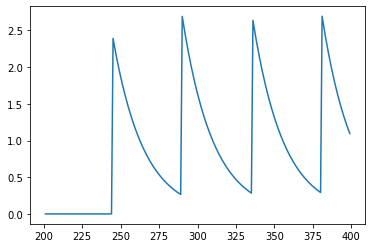

In [7]:
plt.plot(t, events['i_syn_d'])

In [9]:
# Show all recordable variables

nest.GetDefaults("glif_psc_bix")["recordables"]

('ASCurrents_sum',
 'I',
 'I_syn',
 'i_syn_r',
 'i_syn_d',
 'threshold',
 'threshold_spike',
 'threshold_voltage',
 'V_m')